In [1]:
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import keras

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
(x_train, train_y), (x_test, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3866 - val_loss: 0.1860
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1781 - val_loss: 0.1546
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1500 - val_loss: 0.1326
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1304 - val_loss: 0.1196
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1184 - val_loss: 0.1108
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1108 - val_loss: 0.1047
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1049 - val_loss: 0.1008
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1012 - val_loss: 0.0978
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0985 - val_loss: 0.0960
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0970 - val_loss: 0.094

In [8]:
train_encoded_imgs = encoder.predict(x_train)
test_encoded_imgs = encoder.predict(x_test)

train_decoded_imgs = decoder.predict(train_encoded_imgs)
test_decoded_imgs = decoder.predict(test_encoded_imgs)

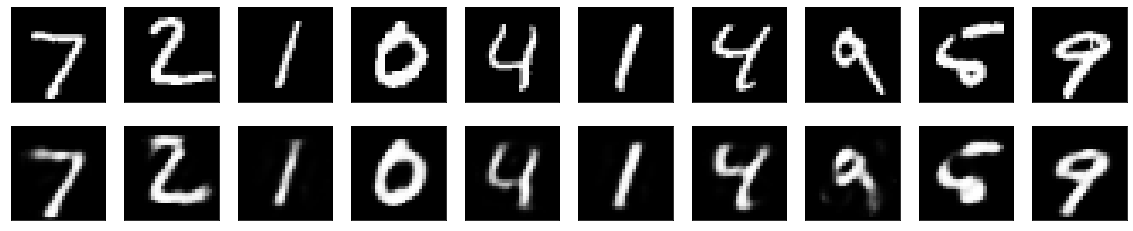

In [9]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
train_X = train_decoded_imgs[:].reshape(-1, 28,28, 1)
test_X = test_decoded_imgs[:].reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

print('Original label:', train_y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
